In [1]:
import pandas as pd
import seaborn as sns
from settings import BASE_DIR
from pandas_profiling import ProfileReport
import json
import matplotlib.pyplot as plt

def load_configs(json_file, interested_model=None):
    x = open("{BaseDir}/TwiiterSentimentAnalysis/{File}".format(BaseDir=BASE_DIR, File=json_file), 'r').read().replace("\n","").replace("\t"," ").split('}',)
    x = [y+'}' for y in x]
    jsons = [json.loads(y) for y in x[:-1]]
    if interested_model != None:
        jsons = [json for json in jsons if json["model"] == interested_model]
    jsons = pd.DataFrame(jsons)
    return jsons

mnb_model_params = load_configs(json_file="RandomSearchModelResults.json")
mnb_model_params[["embedding", "model"]] = mnb_model_params.model.str.split('(TFIDF|W2V)', expand=True).drop(0,axis=1)

<Figure size 720x720 with 0 Axes>

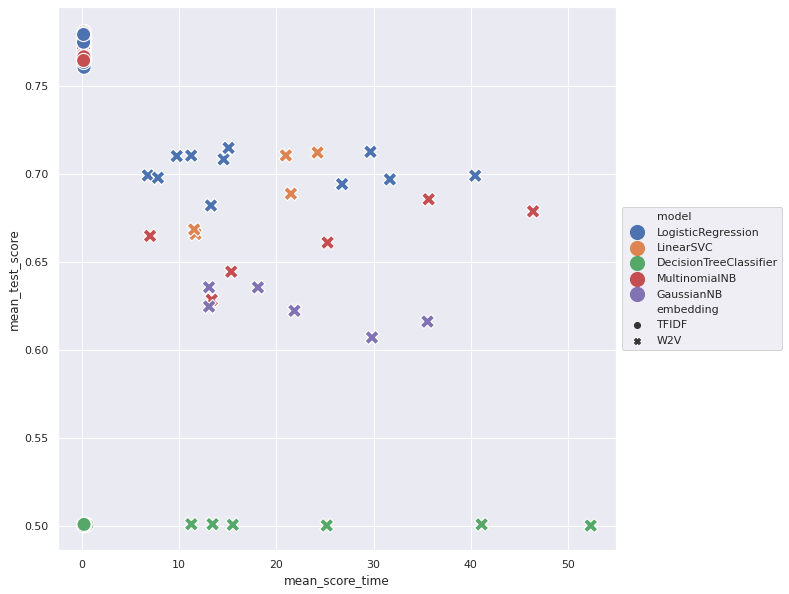

<Figure size 720x720 with 0 Axes>

In [6]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.scatterplot(
    x='mean_score_time',
    y='mean_test_score',
    size='model',
    sizes=(200,200),
    data=mnb_model_params,
    hue='model',
    style='embedding'
)

graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure()

<Figure size 720x720 with 0 Axes>

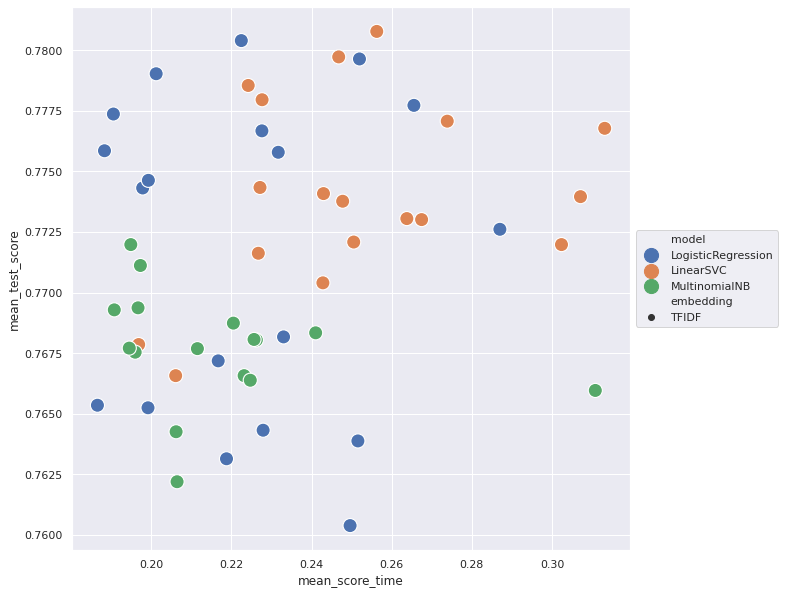

<Figure size 720x720 with 0 Axes>

In [7]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.scatterplot(
    x='mean_score_time',
    y='mean_test_score',
    size='model',
    sizes=(200,200),
    data=mnb_model_params.query('mean_test_score > 0.75'),
    hue='model',
    style='embedding'
)

graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure()

<Figure size 720x720 with 0 Axes>

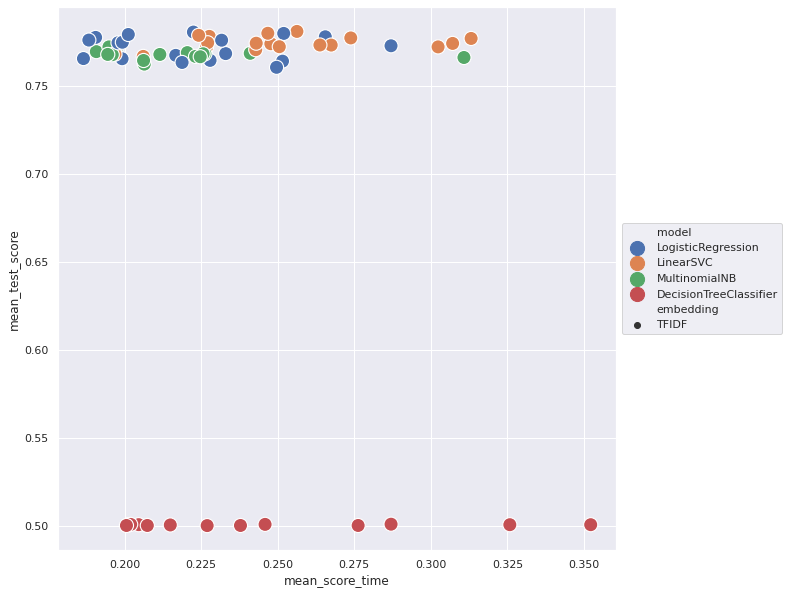

<Figure size 720x720 with 0 Axes>

In [8]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.scatterplot(
    x='mean_score_time',
    y='mean_test_score',
    size='model',
    sizes=(200,200),
    data=mnb_model_params.query('mean_score_time < 0.5'),
    hue='model',
    style='embedding'
)

graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure()

<Figure size 1440x1440 with 0 Axes>

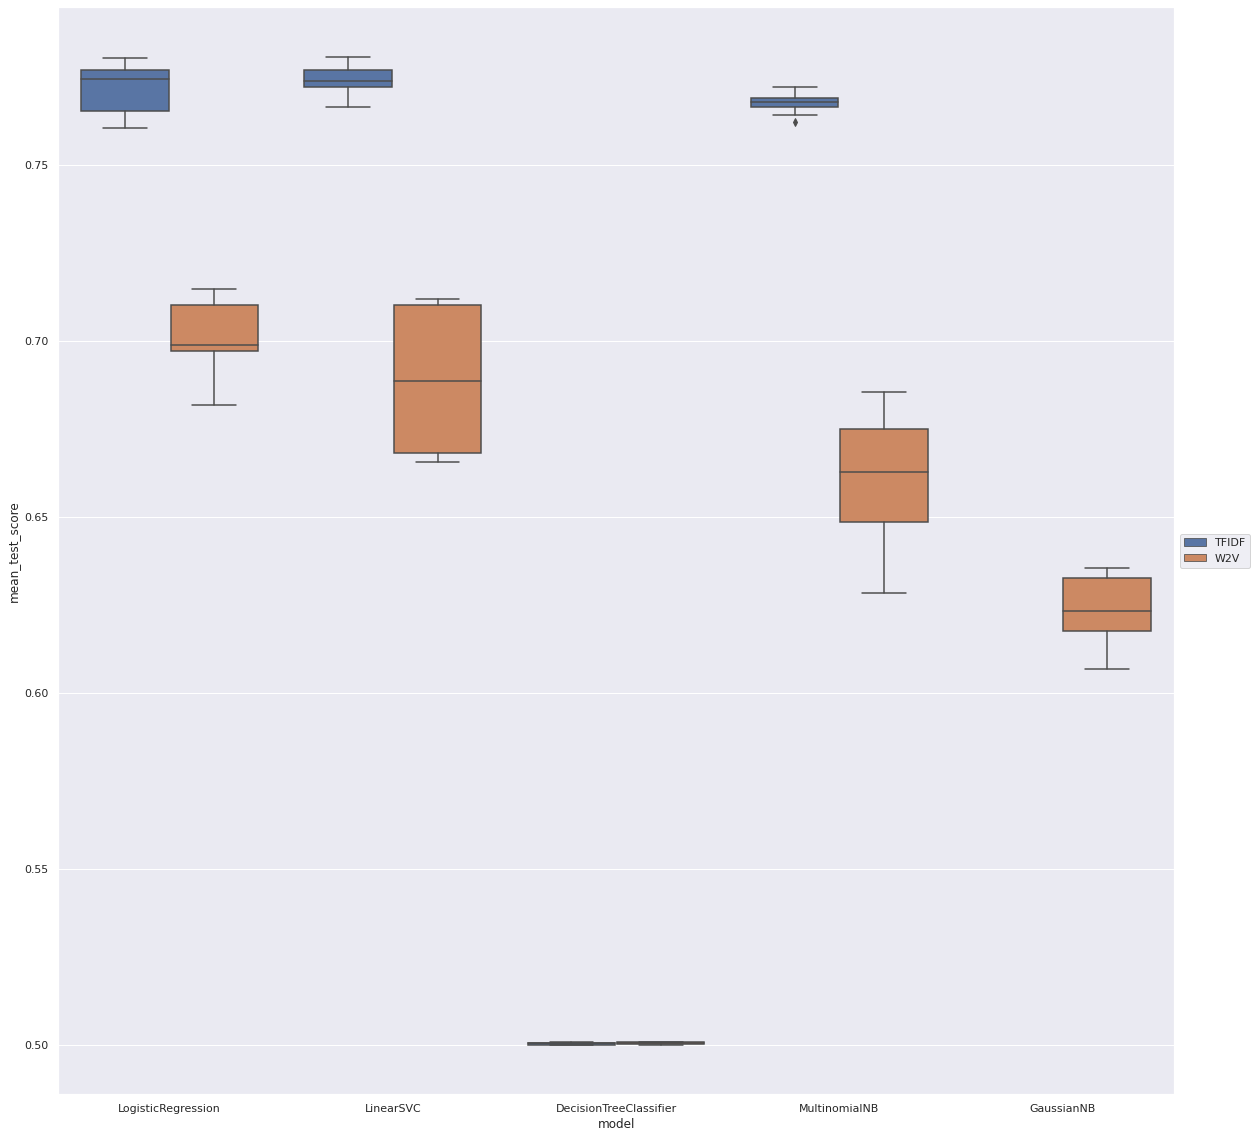

<Figure size 1440x1440 with 0 Axes>

In [9]:
sns.set(rc={"figure.figsize":(20, 20)})
graph = sns.boxplot(x='model', y='mean_test_score', data=mnb_model_params, hue='embedding')
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure()

In [8]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.boxplot(x='model', y='mean_test_score', data=mnb_model_params.query('mean_score_time < 0.5'), hue='embedding')
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [9]:
mnb_model_params.query("model == 'LinearSVC' and embedding == 'TFIDF'")[["mean_score_time", "mean_test_score"]]

,mean_score_time,mean_test_score
1,0.256285,0.780779
6,0.226729,0.771621
7,0.307125,0.773958
10,0.313168,0.776779
14,0.302381,0.771979
20,0.242842,0.770400
25,0.227667,0.777958
31,0.267479,0.773011
32,0.247774,0.773768
34,0.242990,0.774084


In [10]:
mnb_model_params.query("model == 'MultinomialNB' and embedding == 'TFIDF'")[["mean_score_time", "mean_test_score"]]

,mean_score_time,mean_test_score
8,0.310823,0.765958
17,0.241037,0.768337
18,0.206453,0.762189
28,0.226238,0.768042
42,0.220502,0.768737
46,0.225661,0.768063
54,0.197298,0.771116
64,0.190784,0.769284
66,0.196715,0.769368
68,0.194908,0.771979


In [11]:
lsv_param = mnb_model_params.query("model == 'LinearSVC' and embedding == 'TFIDF' and mean_test_score > 0.75").reset_index(drop=True).drop(['model', 'mean_test_score', 'mean_train_score', 'mean_score_time', 'mean_fit_time', 'embedding'], axis=1).dropna(axis=1)
lsv_param

,model__C,model__max_iter,model__ngram_range,model__penalty,model__tfidf_max_features,model__tol,model__dual,model__intercept_scaling
0,0.587321,481.0,"[1, 2]",l2,26221901.0,0.000015,False,0.220479
1,1.253856,568.0,"[1, 2]",l1,25968167.0,0.000784,False,2.223324
2,1.412873,1036.0,"[1, 2]",l2,35938305.0,0.000637,False,9.511401
3,0.989335,1591.0,"[1, 2]",l2,37202359.0,0.000996,False,8.298111
4,1.833503,572.0,"[1, 2]",l2,28401462.0,0.000434,False,3.589749
5,1.799315,1688.0,"[1, 2]",l2,19863308.0,0.000057,False,7.125658
6,0.488782,925.0,"[1, 2]",l1,6614237.0,0.000748,False,1.362973
7,2.071368,1391.0,"[1, 2]",l2,13935123.0,0.000457,False,3.168257
8,1.834132,1585.0,"[1, 2]",l2,42564824.0,0.000972,False,8.062331
9,1.363665,177.0,"[1, 2]",l2,32879502.0,0.000129,False,9.221108


In [14]:
nb_params = mnb_model_params.query("model == 'MultinomialNB' and embedding == 'TFIDF' and mean_test_score > 0.75").reset_index(drop=True).drop(['model', 'mean_test_score', 'mean_train_score', 'mean_score_time', 'mean_fit_time', 'embedding'], axis=1).dropna(axis=1)
nb_params

,model__ngram_range,model__tfidf_max_features,model__alpha
0,"[1, 2]",5062089.0,4.070873
1,"[1, 2]",28927817.0,0.968747
2,"[1, 2]",10681963.0,0.303868
3,"[1, 2]",32662617.0,3.700788
4,"[1, 2]",39229614.0,2.533123
5,"[1, 2]",722144.0,1.779899
6,"[1, 2]",40548687.0,2.732884
7,"[1, 2]",33161022.0,4.250326
8,"[1, 2]",18926461.0,4.197576
9,"[1, 2]",38304828.0,1.975022


In [13]:
ProfileReport(lsv_param)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
ProfileReport(nb_params)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]